# Анализ крупного интернет-магазина

Цель работы заключается в анализе эффективности двух групп (A и B) в рамках интернет-магазина. Исследование включает построение графиков кумулятивной выручки, среднего чека и среднего количества заказов на посетителя для каждой группы, а также анализ относительных изменений между группами. Дополнительно проводится точечный график количества заказов по пользователям и график стоимостей заказов. Задачи также включают определение аномалий через 95-й и 99-й перцентили как для количества заказов, так и для стоимостей. На последующих этапах проводится статистический анализ различий в среднем количестве заказов и среднем чеке между группами по "сырым" и "очищенным" данным, что должно привести к выделению ключевых факторов влияния на эффективность групп и определению оптимальной стратегии для улучшения показателей интернет-магазина.

План работы: 

1) Приоритизация гипотез 

2) Анализ А/В теста

3) Принять решение по результатам и объяснить его



## Загрузка данных и подготовка их к анализу

### подключение библиотек, загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth = 100

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#### гипотезы

In [3]:
#вывод первых строк
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
#общая информация
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Промежуточный вывод по гипотезам: 

Значений: 9, Колонок: 5

Hypothesis - поменять название, тип данных правильный

Reach - поменять название, тип данных правильный

Impact - поменять название, тип данных правильный

Confidence - поменять название, тип данных правильный

Efforts - поменять название, тип данных правильный


#### заказы

In [5]:
#вывод первых строк
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [6]:
#общая информация 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Промежуточный вывод по заказам:

Значений: 1997, Колонок: 5

transactionId - поменять название, тип данных правильный

visitorId - поменять название, тип данных правильный

date - название правильное, тип данных поменять на datetime

revenue - название правильное, тип данных правильный

group - название правильное, тип данных правильный

#### посетители

In [7]:
#вывод первых строк
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
#общая информация 
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Промежуточный вывод по посетителям:

Значений: 62, Колонок: 3

date - название правильное, тип данных поменять на datetime

group - название правильное, тип данных правильный

visitors - название правильное, тип данных правильный

## Изменение названий, изменение типов данных, проверка на пропуски и дубликаты

### изменение названий столбцов 

#### hypothesis

In [9]:
hypothesis.columns = map(str.lower, hypothesis.columns)

In [10]:
#проверка
print(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


#### orders

In [11]:
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

In [12]:
#проверка
print(orders.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


### изменение типов данных

In [13]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
#проверка
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
#проверка
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### проверка на пропуски и дубликаты

#### hypothesis

In [16]:
# Проверка пропусков
missing_values_h = hypothesis.isnull().sum()
print("Пропуски в датафрейме:")
print(missing_values_h)

# Проверка дубликатов
duplicate_rows_h = hypothesis.duplicated().sum()
print("\nКоличество дубликатов в датафрейме:", duplicate_rows_h)

Пропуски в датафрейме:
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Количество дубликатов в датафрейме: 0


#### orders

In [17]:
# Проверка пропусков
missing_values_o = orders.isnull().sum()
print("Пропуски в датафрейме:")
print(missing_values_o)

# Проверка дубликатов
duplicate_rows_o = orders.duplicated().sum()
print("\nКоличество дубликатов в датафрейме:", duplicate_rows_o)

Пропуски в датафрейме:
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Количество дубликатов в датафрейме: 0


#### visitors

In [18]:
# Проверка пропусков
missing_values_v = visitors.isnull().sum()
print("Пропуски в датафрейме:")
print(missing_values_v)

# Проверка дубликатов
duplicate_rows_v = visitors.duplicated().sum()
print("\nКоличество дубликатов в датафрейме:", duplicate_rows_v)

Пропуски в датафрейме:
date        0
group       0
visitors    0
dtype: int64

Количество дубликатов в датафрейме: 0


В ходе предобработки данных: 

Изменили названия столбцов (нижний регистр + пробелы)

Изменили типы данных (там где date, привели к datetime)

Проверили на пропуски и дубликаты - не обнаружено в трёх датафреймах.

## Приоритизация гипотез

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [19]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)

sorted_hypotheses_ice = hypothesis.sort_values(by='ICE', ascending=False)
sorted_hypotheses_ice

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Лидируют гипотезы: 'Запустить акцию, дающую скидку на товар в день рождения', 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' и 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' в то время, как гипотезы 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов', 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар' и 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей' остались внизу по метрике ICE.

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

In [20]:

hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)

sorted_hypotheses_rice = hypothesis.sort_values(by='RICE', ascending=False)
sorted_hypotheses_rice

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Тут уже в можно отметить гипотезы: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средниий чек". В конце списка по метрике RICE находятся следующие гипотезы: "Запустить собственную службу доставки, что сократит срок доставки заказов", "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов" и "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

В расчете RICE мы учитываем новый параметр - reach (скольких пользователей затронет изменение, которое мы хотим внести) и в гипотезах "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек" этот параметр достигает 10/10 и 8/10 - что очень высокий показатель - поэтому эти гипотезы в лидерах 

Анализируя общие таблицы, высокие позиции занимают следующие гипотезы: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" т.к они не сильно проседают в параметре RICE относительно ICE.

## Анализ A/B-теста

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [21]:
dates_groups = orders[['date','group']].drop_duplicates()

orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transaction_id' : pd.Series.nunique, 
                                          'visitor_id' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'purchaser', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,purchaser,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### Проверка корректности создания датафрейма cumulative_data (вычислим максимальную и минимальную дату в cumulative_data и исходных данных).

#### исходные данные

In [39]:
min_date = orders['date'].min()
max_date = orders['date'].max()

# Выведите результаты
print("Минимальная дата:", min_date)
print("Максимальная дата:", max_date)

Минимальная дата: 2019-08-01 00:00:00
Максимальная дата: 2019-08-31 00:00:00


#### cumulative_data

In [41]:
min_date_c = cumulative_data['date'].min()
max_date_c = cumulative_data['date'].max()

# Выведите результаты
print("Минимальная дата:", min_date_c)
print("Максимальная дата:", max_date_c)

Минимальная дата: 2019-08-01 00:00:00
Максимальная дата: 2019-08-31 00:00:00


Минимальная и максимальная даты созданного датафрейма совпадают с минимальной и максимальной датами исходного датафрейма

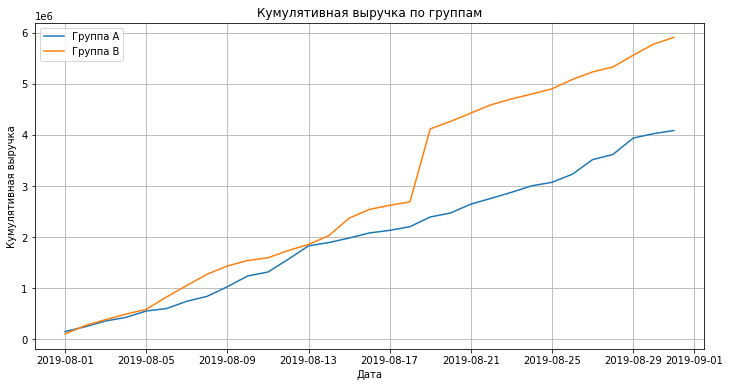

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data[cumulative_data['group'] == 'A']['date'], cumulative_data[cumulative_data['group'] == 'A']['revenue'], label='Группа A')

# Построение графика выручки для группы B
plt.plot(cumulative_data[cumulative_data['group'] == 'B']['date'], cumulative_data[cumulative_data['group'] == 'B']['revenue'], label='Группа B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.grid(True)
plt.show()

Группа В росла быстрее, 13-го числа группы почти сравнялись, но к концу месяца группа B ушла в отрыв по выручке. Также можно увидеть, что с 18 по 19 число было аномальное значение, возможно в этот день был какой-то дорогой заказ у группы В.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

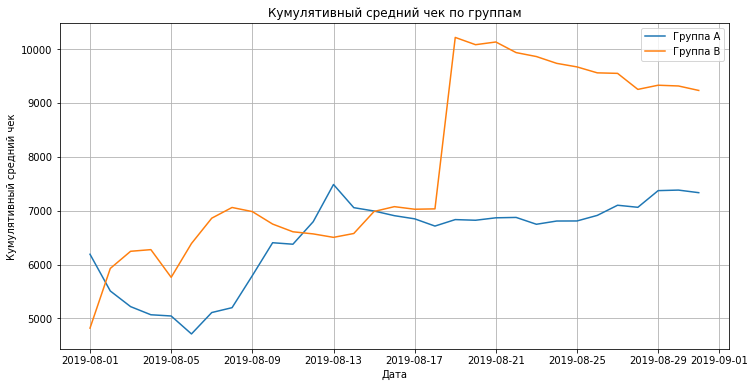

In [23]:

# Рассчет кумулятивного среднего чека
cumulative_data['average_check'] = cumulative_data['revenue'] / cumulative_data['orders']

# Построение графика для группы A
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data[cumulative_data['group'] == 'A']['date'], cumulative_data[cumulative_data['group'] == 'A']['average_check'], label='Группа A')

# Построение графика  для группы B
plt.plot(cumulative_data[cumulative_data['group'] == 'B']['date'], cumulative_data[cumulative_data['group'] == 'B']['average_check'], label='Группа B')

plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend()
plt.grid(True)
plt.show()


Тут ситуация сложнее, где-то средний чек больше у группы А, где-то у Б, с 18 по 19 опять же можно увидеть, что был сделан какой-то аномально крупный заказ, который и дал прирост группе B. Но график А наоборот, идет стабильно с 17 числа, не было аномально крупных заказов.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

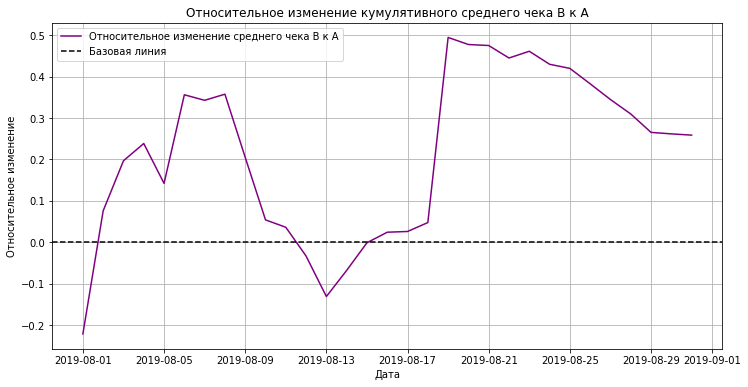

In [24]:
# Объединение данных кумулятивных средних чеков для групп A и B
cumulative_avg_check_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'average_check']]
cumulative_avg_check_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'average_check']]
merged_cumulative_avg_check = cumulative_avg_check_A.merge(cumulative_avg_check_B, on='date', suffixes=('_A', '_B'))

# Рассчет относительного изменения кумулятивного среднего чека группы B к группе A
merged_cumulative_avg_check['relative_change'] = (merged_cumulative_avg_check['average_check_B'] / merged_cumulative_avg_check['average_check_A']) - 1

# Построение графика относительного изменения кумулятивного среднего чека
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_avg_check['date'], merged_cumulative_avg_check['relative_change'], label='Относительное изменение среднего чека B к A', color='purple')

plt.axhline(y=0, color='black', linestyle='--', label='Базовая линия')

plt.title('Относительное изменение кумулятивного среднего чека B к A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.legend()
plt.grid(True)
plt.show()


График зависит от предыдущего пункта. 13 числа группа А была выше, а так как у нас обратная пропорция, тут видна просадка. Тут также наблюдается редкий взлет 18-19 числа из-за аномальной покупки.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

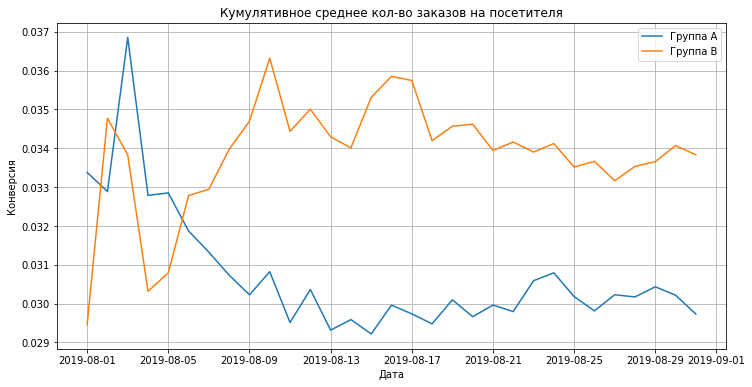

In [42]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='Группа А')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='Группа В')

plt.xlabel('Дата')
plt.ylabel('Конверсия')

plt.title('Кумулятивное среднее кол-во заказов на посетителя')
plt.legend()
plt.show()



В начале месяца среднее значение группы А было намного больше, 3-го числа даже достигло своего пика, но с 4 числа пошло на спад. Группа Б была нестабильно относительно  в начале месяца (до 11-12 числа), потом шла относительно стабильно до конца месяца.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения

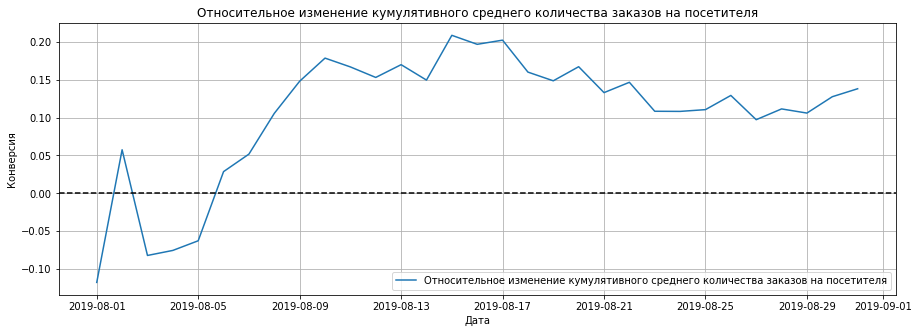

In [43]:
merged_cumulative_conversions = cumulative_data_a[['date', 'conversion']].merge(cumulative_data_b[['date', 'conversion']],
                                                                                left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA'] - 1, label="Относительное изменение кумулятивного среднего количества заказов на посетителя")

plt.xlabel('Дата')
plt.ylabel('Конверсия')

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()


Как мы уже говорили в пункте 4.5, до 10-го числа графики вели себя нестабильно, 6-го числа группы сравнялись по конверсии, но потом группа B уверенно вышла вперед. Во второй половине месяца графики идут стабильно.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

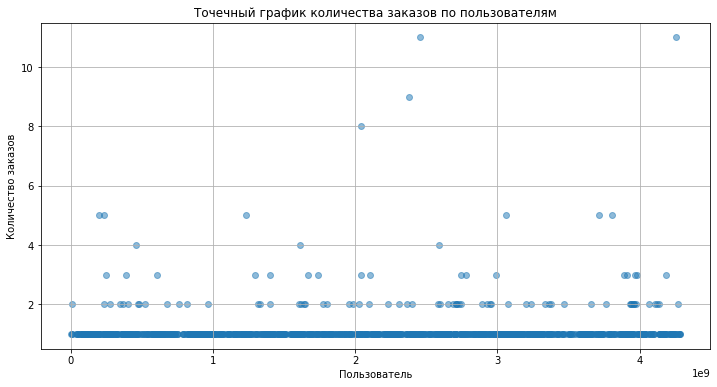

In [27]:
# Рассчет количества заказов для каждого пользователя
orders_per_user = orders.groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_per_user.columns = ['visitor_id', 'orders_count']

plt.figure(figsize=(12, 6))
plt.scatter(orders_per_user['visitor_id'], orders_per_user['orders_count'], alpha=0.5)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()


Больше всего пользователей, которые совершили 1-2 заказов, количество заказов больше двух - редкость, хоть они и являются прибыльными для интернет-магазина. 

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [28]:
# Рассчет перцентилей
percentiles = np.percentile(orders_per_user['orders_count'], [95, 99])

print(f'95-й перцентиль: {percentiles[0]} заказа')
print(f'99-й перцентиль: {percentiles[1]} заказа')

95-й перцентиль: 2.0 заказа
99-й перцентиль: 4.0 заказа


95% всех пользователей находятся в пределах двух заказов или менее, а 99% пользователей находятся в пределах четырех заказов, то есть 5 и более заказов уже редкость. 

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

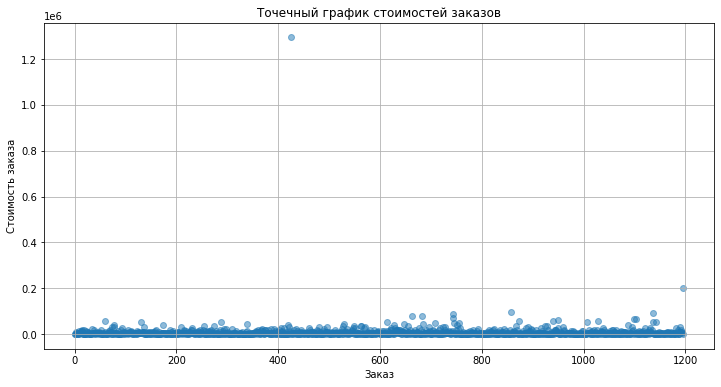

In [29]:
# Построение точечного графика
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders['revenue'])), orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказа')
plt.grid(True)
plt.show()

По точечному графику видно, что заказы были сделаны в основном до 150000, есть выброс на 1.2 млн, но это опять же мы считаем аномальным значением. Можно построить такой же график, но поставить ограничение до 100000, чтобы нагляднее увидеть стоимость заказов

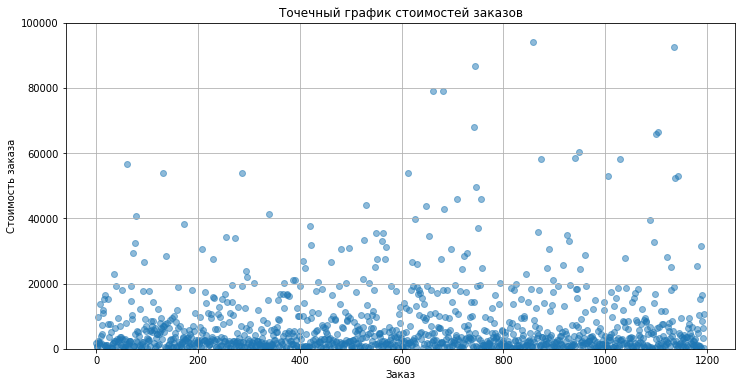

In [30]:

plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders['revenue'])), orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 100000)  
plt.grid(True)
plt.show()


С ограничением в 100000 уже можно сделать вывод, что заказы дороже 20 т.р. можно считать редкими, а заказы дешевле 10000 - самые распространенные у интернет-магазина.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

In [31]:

percentiles = np.round(np.percentile(orders['revenue'], [95, 99]), 1)

print(f'95-й перцентиль: {percentiles[0]}')
print(f'99-й перцентиль: {percentiles[1]}')


95-й перцентиль: 28000.0
99-й перцентиль: 58233.2


Для определения аномальных заказов можно использовать 99-й перцентиль в качестве границы. Это означает, что все заказы с суммой стоимости выше 58233.2 могут считаться аномальными.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза: статистически значимых различий в среднем количестве заказов на посетителя между группами нет

Альтернативная гипотеза: статистически значимые различия в среднем количестве заказов на посетителя между группами есть

In [32]:
# Группировка данных по группе A
orders_group_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .rename(columns={'transaction_id': 'orders'})
)

# Группировка данных по группе B
orders_group_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .rename(columns={'transaction_id': 'orders'})
)

for group, orders_data in zip(['A', 'B'], [orders_group_A, orders_group_B]):
    num_customers = len(orders_data)
    total_orders = orders_data["orders"].sum()
    visitors_count = visitors[visitors['group'] == group]['visitors'].sum()

    print(f'Группа {group}:')
    print(f'  Количество покупателей: {num_customers}')
    print(f'  Общее количество покупок: {total_orders}')
    print(f'  Количество посетителей: {visitors_count}\n')

Группа A:
  Количество покупателей: 503
  Общее количество покупок: 557
  Количество посетителей: 18736

Группа B:
  Количество покупателей: 586
  Общее количество покупок: 640
  Количество посетителей: 18916



In [33]:
# Создание серии заказов для пользователей, не совершивших покупки в группе A
orders_by_non_purchased_users_A = pd.Series([0] * (visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_group_A)), name='orders')

# Создание серии заказов для пользователей, не совершивших покупки в группе B
orders_by_non_purchased_users_B = pd.Series([0] * (visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_group_B)), name='orders')

# Объединение данных по заказам с данными по пользователям, не совершившим покупки
sampleA = pd.concat([orders_group_A['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([orders_group_B['orders'], orders_by_non_purchased_users_B], axis=0)

# Рассчет относительного прироста конверсии
relative_conversion_growth = sampleB.mean() / sampleA.mean() - 1

print(f'\nОтносительный прирост конверсии группы B по отношению к группе A: {relative_conversion_growth:.3f}')

# Проверка статистической значимости различий
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print(f'P-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Нулевая гипотеза не опровергнута')
else:
    print('Нулевая гипотеза опровергнута')



Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.016792355056752608
Нулевая гипотеза не опровергнута


Полученное p-value равно 0.017, что меньше уровня значимости 0.05. Это означает, что у нас есть статистически значимые различия в конверсии между группами A и B на "сырых" данных. Следовательно, мы отвергаем нулевую гипотезу о том, что различий нет.

Относительный выигрыш группы B над группой A составляет 13.8%. Это говорит о том, что конверсия в группе B выше на 13.8% по сравнению с группой A на "сырых" данных.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем чеке заказа между группами по «сырым» данным нет

Альтернативная гипотеза: различия в среднем чеке заказа между группами по «сырым» данным есть

In [34]:
# Рассчет статистической значимости различий в среднем чеке между группами
results_revenue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print(f'P-value для сравнения средних чеков: {results_revenue.pvalue:.5f}')

alpha_revenue = 0.05

if results_revenue.pvalue < alpha_revenue:
    print('Нулевая гипотеза о том, что различий в среднем чеке нет, отвергнута')
else:
    print('Нулевая гипотеза о том, что различий в среднем чеке нет, не опровергнута')

P-value для сравнения средних чеков: 0.72929
Нулевая гипотеза о том, что различий в среднем чеке нет, не опровергнута


In [35]:
# Рассчет относительного показателя среднего чека
relative_revenue_difference = orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1

print(f'Относительный показатель различия среднего чека между группами B и A: {relative_revenue_difference:.3f}')

Относительный показатель различия среднего чека между группами B и A: 0.259


Полученное p-value при сравнении средних чеков между группами A и B составляет значительно больше 0.05, что говорит о том, что нет статистически значимых различий в средних чеках по "сырым" данным. Следовательно, нулевая гипотеза о том, что средние чеки схожи, не может быть отвергнута.

Однако, несмотря на отсутствие статистической значимости, стоит обратить внимание на относительный показатель различия средних чеков. Средний чек группы B оказался значительно выше среднего чека группы A на 26%.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза:  различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет

Альтернативная гипотеза:  различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть

In [36]:
limit_orders = 2
limit_revenue = 58000
usersWithManyOrders = pd.concat([orders_group_A[orders_group_A['orders']>limit_orders]['visitor_id'], 
                                orders_group_B[orders_group_B['orders']>limit_orders]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitor_id']
abnormal_users = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormal_users)))

Кол-во аномальных пользователей: 31


In [37]:
# Создание "очищенных" выборок для каждой группы
sampleA_filtered = pd.concat([
    orders_group_A[~orders_group_A['visitor_id'].isin(abnormal_users)]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_group_A)), name='orders')
], axis=0)

sampleB_filtered = pd.concat([
    orders_group_B[~orders_group_B['visitor_id'].isin(abnormal_users)]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_group_B)), name='orders')
], axis=0)

# Рассчет относительного показателя и статистической значимости
relative_conversion_increase = sampleB_filtered.mean() / sampleA_filtered.mean() - 1
p_value_filtered = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered).pvalue

print(f'\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {relative_conversion_increase:.3f}')
print(f'P-value (очищенные данные): {p_value_filtered}')

# Проверка статистической значимости
if p_value_filtered < alpha:
    print('Различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть')
else:
    print('Различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет')



Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.174
P-value (очищенные данные): 0.010074820358290555
Различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть


Нулевую гипотезу отвергаем - различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть. Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.174. Этот показатель оказался выше, чем при анализе "сырых" данных, где относительный выигрыш составил 0.138. Таким образом, после удаления выбросов конверсия группы B значительно превосходит конверсию группы A.






### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем чеке заказа между группами по «очищенным» данным нет

Альтернативная гипотеза: различия в среднем чеке заказа между группами по «очищенным» данным есть

In [38]:
# Рассчет статистической значимости различий в среднем чеке между группами по "очищенным" данным
p_value_revenue = stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', ~orders['visitor_id'].isin(abnormal_users))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', ~orders['visitor_id'].isin(abnormal_users))]['revenue'],
    alternative='two-sided'
)[1]

# Рассчет относительного показателя "B" и "A" по среднему чеку
relative_revenue_B_A = (
    orders[np.logical_and(orders['group'] == 'B', ~orders['visitor_id'].isin(abnormal_users))]['revenue'].mean() /
    orders[np.logical_and(orders['group'] == 'A', ~orders['visitor_id'].isin(abnormal_users))]['revenue'].mean() - 1
)

print(f"P-value: {p_value_revenue:.3f}")
print(f"Относительный показатель 'B' и 'A' по среднему чеку: {relative_revenue_B_A:.3f}")

# Проверка статистической значимости
alpha_revenue = 0.05
if p_value_revenue < alpha_revenue:
    print("Различия в среднем чеке между группами по 'очищенным' данным есть")
else:
    print("Различий в среднем чеке между группами по 'очищенным' данным нет")



P-value: 0.798
Относительный показатель 'B' и 'A' по среднему чеку: -0.020
Различий в среднем чеке между группами по 'очищенным' данным нет


Гипотезы не были опровергнуты что в сырых, что в очищенных данных. Таким образом, можно сделать вывод, что на основе имеющихся данных различий в среднем чеке между группами A и B нет, как по "сырым", так и по "очищенным" данным. Из-за аномалии в сырых данных выше относительный показатель В и А, но это не имеет значения.

### Примите решение по результатам теста и объясните его.
Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.

2. Остановить тест, зафиксировать отсутствие различий между группами.

3. Продолжить тест.

Проанализировав данные, можно сделать вывод, что нужно остановить тест и зафиксировать победу группы B. Мы построили графики многих метрик, где зафиксировали, что группа B идёт везде выше, а именно кумулятивная выручка, кумулятивный средний чек, кумулятивное среднее количество заказов на посетителя (конверсия), количество заказов по пользователям и т.д. 

Разница между сырыми и очищенными данными: 
По сырым и по очищенным данным различия в конверсии групп A и B есть. Выигрыш группы "B" над "A" равен 17,4% по "очищенным" и 13.8% по "сырым" данным. 

После очистки разница между средними чеками стала минимальна, так как в сырых данных был сделан большой заказ (в 18х - 19х числах месяца было выявлено аномальное значение). 



# Итоговый вывод

В ходе анализа, был проанализирован крупный интернет-магазин, а точнее мы провели А/В тест, где выявили победу одной из групп. Перед этим была проведена предобработка данных, где мы поменяли типы данных, где это нужно, проверили датафреймы на пропуски и дубликаты, а также посчитали метрики ICE и RICE. К ходе анализа А/В теста были построены графики, где мы смогли посмотреть на то, как меняются метрики по датам и смогли найти аномальные значения, которые вскоре удалили для дальнейшего анализа по очищенным данным.